In [68]:
import numpy as np
import itertools
from itertools import cycle, islice
import operator
import time
import random
import matplotlib.pyplot as plt

Function to put brackets around left and right parts of the expression (only if the length of the part is more than 1).

In [48]:
def put_brackets(left_part, right_part, operator):
    if len(left_part)> 1 and len(right_part) > 1:
        return "("+left_part+")"+operator+"("+right_part+")"
    if len(left_part)> 1 and len(right_part) == 1:
        return "("+left_part+")"+operator+right_part
    if len(left_part)== 1 and len(right_part) > 1:
        return left_part+operator+"("+right_part+")"
    if len(left_part)== 1 and len(right_part) == 1:
        return left_part+operator+right_part

Minimizing recursive function

In [47]:
def minimize(expr):
    # base case
    if expr.isdigit():
        return int(expr), expr
    #variable to put final result. It is infinity in the beginning to be sure that at first comparison
    #between res and our expression result, res would be overwritten.
    res = np.inf
    #variable to put our final expression as string with brackets
    final_expr = ""
    # iterating over the expression, looking for operators
    for i in range(len(expr) - 1):
        if expr[i] == '+':
            #expression before operator
            left_expr = expr[:i]
            #expression after operator
            right_expr = expr[i + 1 :len(expr)]
            #computing their values by recursively calling the minimize function
            left_value, left_part = minimize(left_expr)
            right_value, right_part = minimize(right_expr)
            # if the sum of values is less than our minimal result before, this solution becomes new minimal result
            if left_value + right_value < res:
                res = left_value + right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '*':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = minimize(left_expr)
            right_value, right_part = minimize(right_expr)
            if left_value * right_value < res:
                res = left_value * right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '-':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = minimize(left_expr)
            right_value, right_part = minimize(right_expr)
            if left_value - right_value < res:
                res = left_value - right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '/':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = minimize(left_expr)
            right_value, right_part = minimize(right_expr)
            #preventing division by zero
            if right_value != 0:
                if left_value / right_value < res:
                    res = left_value / right_value
                    final_expr = put_brackets(left_part, right_part, expr[i])
    return res, final_expr

In [5]:
minimize("1*3-2*5/1")

(-7.0, '1*(3-(2*(5/1)))')

Maximizing recursive function that works exactly as the minimizing one only the other way around.

In [51]:
def maximize (expr):
    if expr.isdigit():
        return int(expr), expr
    res = np.NINF
    final_expr = ""
    for i in range(len(expr) - 1):
        left_expr, right_expr = "", ""
        if expr[i] == '+':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = maximize(left_expr)
            right_value, right_part = maximize(right_expr)
            if left_value + right_value > res:
                res = left_value + right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '*':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = maximize(left_expr)
            right_value, right_part = maximize(right_expr)
            if left_value * right_value > res:
                res = left_value * right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '-':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = maximize(left_expr)
            right_value, right_part = maximize(right_expr)
            if left_value - right_value > res:
                res = left_value - right_value
                final_expr = put_brackets(left_part, right_part, expr[i])
        if expr[i] == '/':
            left_expr = expr[:i]
            right_expr = expr[i + 1 :len(expr)]
            left_value, left_part = maximize(left_expr)
            right_value, right_part = maximize(right_expr)
            if right_value != 0:
                if left_value / right_value > res:
                    res = left_value / right_value
                    final_expr = put_brackets(left_part, right_part, expr[i])
    return res, final_expr

In [46]:
maximize('1*2*3*4-10')

expr 4 10
values 4 10
expr 3*4 10
values 12 10
expr 4 10
values 4 10
expr 2*3*4 10
values 24 10
expr 4 10
values 4 10
expr 3*4 10
values 12 10
expr 4 10
values 4 10


(14, '1*((2*(3*4))-(10))')

Function that takes a list of numbers and list of operators and returns all possible combinations of operators that can be between these numbers with possible repetitions.

In [8]:
def put_operators(numbers, operators):
    oper_nr = len(numbers)-1
    opers = list(itertools.product(operators, repeat=oper_nr))
    return opers

In [9]:
put_operators([1, 2, 3, 4], ['*', '+'])

[('*', '*', '*'),
 ('*', '*', '+'),
 ('*', '+', '*'),
 ('*', '+', '+'),
 ('+', '*', '*'),
 ('+', '*', '+'),
 ('+', '+', '*'),
 ('+', '+', '+')]

From https://docs.python.org/2/library/itertools.html

In [10]:
def roundrobin(*iterables):
    "roundrobin('ABC', 'D', 'EF') --> A D E B F C"
    # Recipe credited to George Sakkis
    num_active = len(iterables)
    nexts = cycle(iter(it).__next__ for it in iterables)
    while num_active:
        try:
            for next in nexts:
                yield next()
        except StopIteration:
            # Remove the iterator we just exhausted from the cycle.
            num_active -= 1
            nexts = cycle(islice(nexts, num_active))

The final function that takes numbers, possible operators and maximize/minimize function as arguments and returns the maximal/minimal result and how it was achieved.

In [49]:
def put_operators_final(numbers, operators, func):
    results={}
    #possible operators' combinations with repetitions
    opers = put_operators(numbers, operators)
    for oper in opers:
        #creating a possible expression preserving numbers' order
        str_expr = ''.join(str(e) for e in roundrobin(numbers, oper))
        #saving expression as dictionary key with its result as value
        results[str_expr] = func(str_expr)
    if func == maximize:
        #looking for max result
        key = max(results, key=lambda k: results[k][0])
    if func == minimize:
        #looking for min result
        key = min(results, key=lambda k: results[k][0])
    return results[key]

In [123]:
put_operators_final([2, 1, 7, 1, 4, 3], ['*', '+', '-', '/'], maximize)

(315, '(2+1)*(7*((1+4)*3))')

In [72]:
put_operators_final([2, 1, 7, 1, 4, 3], ['*', '+', '-'], minimize)

(-231, '(2+1)*(7*(1-(4*3)))')

In [55]:
def measure_time(iterations, num_amount, num_min, num_max,  operators, func):
    random_numbers = [random.randint(num_min, num_max) for x in range(num_amount)]
    results = []
    print(random_numbers)
    for i in range(iterations):
        print(i)
        start_time = time.time()
        result = put_operators_final(random_numbers, operators, func)
        end_time = time.time()
        results.append(end_time-start_time)
    return results

In [67]:
iter5_num5_1_10_all_max = measure_time(iterations=5, num_amount=5, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=maximize)
iter5_num6_1_10_all_max = measure_time(iterations=5, num_amount=6, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=maximize)
iter5_num7_1_10_all_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=maximize)
iter5_num8_1_10_all_max = measure_time(iterations=5, num_amount=8, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=maximize)

[1, 6, 9, 10, 8]
0
1
2
3
4
[7, 9, 8, 4, 2, 5]
0
1
2
3
4
[5, 9, 2, 8, 9, 9, 2]
0
1
2
3
4
[1, 9, 4, 6, 1, 4, 10, 8]
0
1
2
3
4


In [105]:
iter5_num9_1_10_all_max = measure_time(iterations=5, num_amount=9, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=maximize)

[7, 1, 4, 8, 3, 2, 10, 7, 9]
0
1
2
3
4


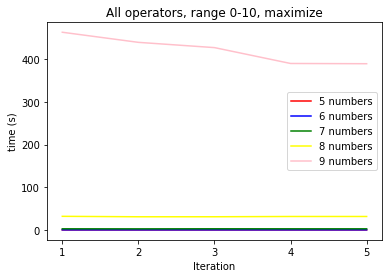

In [116]:
plt.plot(range(1, 6), iter5_num5_1_10_all_max, color='red', label='5 numbers')
plt.plot(range(1, 6), iter5_num6_1_10_all_max, color='blue', label='6 numbers')
plt.plot(range(1, 6), iter5_num7_1_10_all_max, color='green', label='7 numbers')
plt.plot(range(1, 6), iter5_num8_1_10_all_max, color='yellow', label='8 numbers')
plt.plot(range(1, 6), iter5_num9_1_10_all_max, color='pink', label='9 numbers')
plt.ylabel("time (s)")
plt.xlabel("Iteration")
plt.xticks([1, 2, 3, 4, 5])
plt.title("All operators, range 0-10, maximize")
plt.legend()
plt.show()

In [78]:
def average_time (measure_list):
    res = []
    for l in measure_list:
        res.append(np.average(l))
    return res

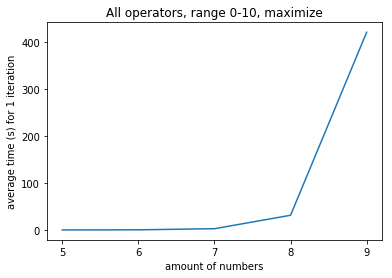

In [117]:
plt.plot(range(5, 10), average_time([iter5_num5_1_10_all_max, iter5_num6_1_10_all_max, iter5_num7_1_10_all_max, 
                                    iter5_num8_1_10_all_max, iter5_num9_1_10_all_max]))
plt.ylabel("average time (s) for 1 iteration")
plt.xlabel("amount of numbers")
plt.xticks([5, 6, 7, 8, 9])
plt.title("All operators, range 0-10, maximize")
plt.show()

In [84]:
iter5_num7_1_10_1_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10, 
                                         operators=['*'], func=maximize)
iter5_num7_1_10_2_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10, 
                                         operators=['*', '+'], func=maximize)
iter5_num7_1_10_3_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10, 
                                         operators=['*', '+', '-'], func=maximize)

[9, 3, 8, 1, 4, 4, 1]
0
1
2
3
4
[8, 9, 3, 5, 1, 9, 5]
0
1
2
3
4
[6, 7, 5, 1, 10, 6, 1]
0
1
2
3
4


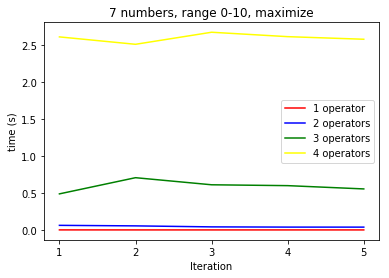

In [118]:
plt.plot(range(1, 6), iter5_num7_1_10_1_max, color='red', label='1 operator')
plt.plot(range(1, 6), iter5_num7_1_10_2_max, color='blue', label='2 operators')
plt.plot(range(1, 6), iter5_num7_1_10_3_max, color='green', label='3 operators')
plt.plot(range(1, 6), iter5_num7_1_10_all_max, color='yellow', label='4 operators')
plt.ylabel("time (s)")
plt.xlabel("Iteration")
plt.xticks([1, 2, 3, 4, 5])
plt.title("7 numbers, range 0-10, maximize")
plt.legend()
plt.show()

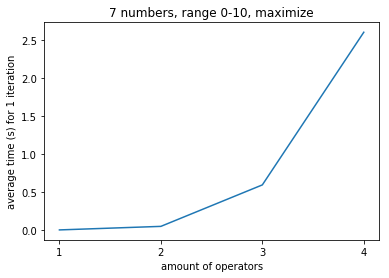

In [119]:
plt.plot([1, 2, 3, 4], average_time([iter5_num7_1_10_1_max, iter5_num7_1_10_2_max, iter5_num7_1_10_3_max, iter5_num7_1_10_all_max]))
plt.ylabel("average time (s) for 1 iteration")
plt.xlabel("amount of operators")
plt.xticks([1, 2, 3, 4])
plt.title("7 numbers, range 0-10, maximize")
plt.show()

In [99]:
iter5_num7_1_100_all_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=100, 
                                         operators=['*', '+', '-', '/'], func=maximize)
iter5_num7_1_1000_all_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=1000, 
                                         operators=['*', '+', '-', '/'], func=maximize)
iter5_num7_1_10000_all_max = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10000, 
                                         operators=['*', '+', '-', '/'], func=maximize)

[33, 61, 25, 69, 6, 93, 99]
0
1
2
3
4
[189, 186, 518, 127, 442, 222, 408]
0
1
2
3
4
[9463, 1069, 2702, 7680, 1353, 1817, 3940]
0
1
2
3
4


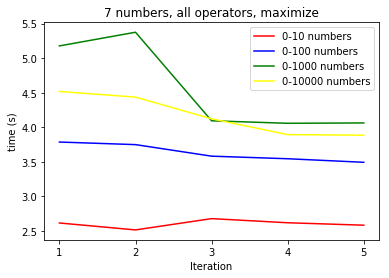

In [120]:
plt.plot(range(1, 6), iter5_num7_1_10_all_max, color='red', label='0-10 numbers')
plt.plot(range(1, 6), iter5_num7_1_100_all_max, color='blue', label='0-100 numbers')
plt.plot(range(1, 6), iter5_num7_1_1000_all_max, color='green', label='0-1000 numbers')
plt.plot(range(1, 6), iter5_num7_1_10000_all_max, color='yellow', label='0-10000 numbers')
plt.ylabel("time (s)")
plt.xlabel("Iteration")
plt.xticks([1, 2, 3, 4, 5])
plt.title("7 numbers, all operators, maximize")
plt.legend()
plt.show()

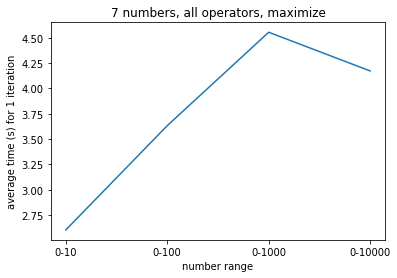

In [121]:
plt.plot([1, 2, 3, 4], average_time([iter5_num7_1_10_all_max, iter5_num7_1_100_all_max, iter5_num7_1_1000_all_max, iter5_num7_1_10000_all_max]))
plt.ylabel("average time (s) for 1 iteration")
plt.xlabel("number range")
my_names = ["0-10", "0-100", "0-1000", "0-10000"]
plt.xticks([1, 2, 3, 4], my_names)
plt.title("7 numbers, all operators, maximize")
plt.show()

In [113]:
iter5_num5_1_10_all_min = measure_time(iterations=5, num_amount=5, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=minimize)
iter5_num6_1_10_all_min = measure_time(iterations=5, num_amount=6, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=minimize)
iter5_num7_1_10_all_min = measure_time(iterations=5, num_amount=7, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=minimize)
iter5_num8_1_10_all_min = measure_time(iterations=5, num_amount=8, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=minimize)
iter5_num9_1_10_all_min = measure_time(iterations=5, num_amount=9, num_min=1, num_max=10, 
                                         operators=['*', '+', '-', '/'], func=minimize)

[2, 3, 3, 2, 6]
0
1
2
3
4
[8, 5, 6, 10, 5, 9]
0
1
2
3
4
[7, 4, 4, 4, 6, 5, 6]
0
1
2
3
4
[3, 7, 3, 6, 5, 3, 3, 1]
0
1
2
3
4
[4, 9, 5, 2, 10, 4, 7, 9, 1]
0
1
2
3
4


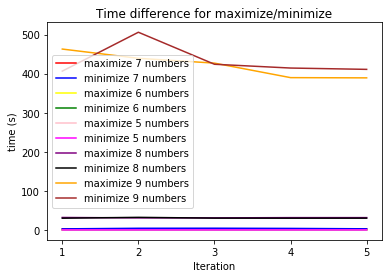

In [115]:
plt.plot(range(1, 6), iter5_num7_1_10_all_max, color='red', label='maximize 7 numbers')
plt.plot(range(1, 6), iter5_num7_1_10_all_min, color='blue', label='minimize 7 numbers')
plt.plot(range(1, 6), iter5_num6_1_10_all_max, color='yellow', label='maximize 6 numbers')
plt.plot(range(1, 6), iter5_num6_1_10_all_min, color='green', label='minimize 6 numbers')
plt.plot(range(1, 6), iter5_num5_1_10_all_max, color='pink', label='maximize 5 numbers')
plt.plot(range(1, 6), iter5_num5_1_10_all_min, color='magenta', label='minimize 5 numbers')
plt.plot(range(1, 6), iter5_num8_1_10_all_max, color='purple', label='maximize 8 numbers')
plt.plot(range(1, 6), iter5_num8_1_10_all_min, color='black', label='minimize 8 numbers')
plt.plot(range(1, 6), iter5_num9_1_10_all_max, color='orange', label='maximize 9 numbers')
plt.plot(range(1, 6), iter5_num9_1_10_all_min, color='brown', label='minimize 9 numbers')
plt.ylabel("time (s)")
plt.xlabel("Iteration")
plt.xticks([1, 2, 3, 4, 5])
plt.title("Time difference for maximize/minimize")
plt.legend()
plt.show()

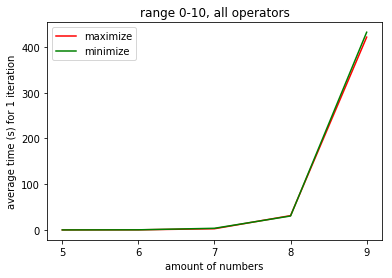

In [122]:
plt.plot(range(5, 10), average_time([iter5_num5_1_10_all_max, iter5_num6_1_10_all_max, iter5_num7_1_10_all_max, 
                                    iter5_num8_1_10_all_max, iter5_num9_1_10_all_max]), color='red', label='maximize')
plt.plot(range(5, 10), average_time([iter5_num5_1_10_all_min, iter5_num6_1_10_all_min, iter5_num7_1_10_all_min, 
                                    iter5_num8_1_10_all_min, iter5_num9_1_10_all_min]), color='green', label='minimize')
plt.ylabel("average time (s) for 1 iteration")
plt.xlabel("amount of numbers")
plt.xticks([5, 6, 7, 8, 9])
plt.legend()
plt.title("range 0-10, all operators")
plt.show()